In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D

In [18]:
(X_train, Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

In [19]:
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

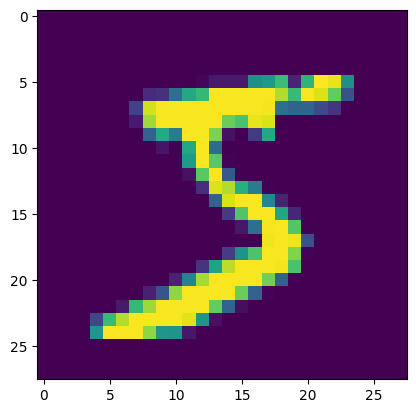

In [20]:
print(Y_train[0])
print(X_train[0])


import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [21]:
X_train = X_train/255
X_test = X_test/255


In [22]:
# with no padding
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu' , input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu'))
model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid', activation= 'relu'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu' ))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [24]:
# with padding
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation= 'relu' , input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation= 'relu'))
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same', activation= 'relu'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu' ))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)               

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])
history = model.fit(X_train,Y_train, validation_split= 0.2 , epochs = 10  )

Epoch 1/10
1500/1500 [==============================] - 11s 5ms/step - loss: 0.1388 - accuracy: 0.9567 - val_loss: 0.0724 - val_accuracy: 0.9796
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0484 - val_accuracy: 0.9861
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0560 - val_accuracy: 0.9868
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0600 - val_accuracy: 0.9873
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0695 - val_accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0627 - val_accuracy

In [27]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


0.9882

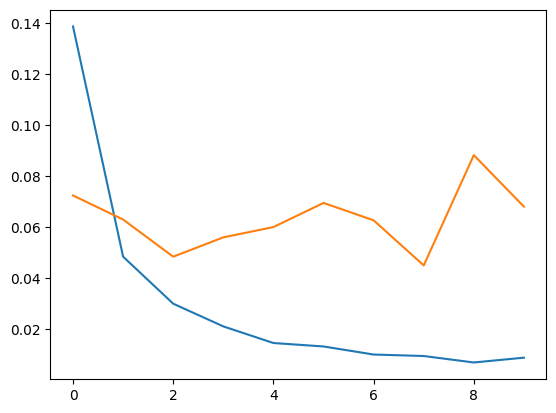

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

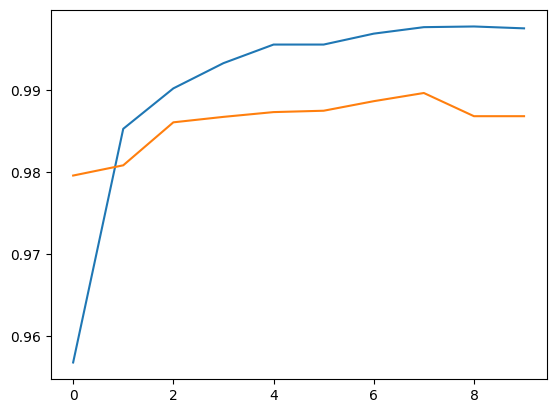

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])